# Question 1:
a) To find the vertices of P we need an algorithm that finds the point intersections of 3 planes. First build n by 3 matrix $A$ of the coefficients of the inequalities: $a_{11} a_{12}\cdots, a_{n3}$. Then take submatrices of each combination of 3 rows. There are $\binom{n}{3}$ combinations. We solve each of these submatrices to get the intersection of the 3 planes. Once we have all the vertices, we just need to check that each of them satisfies the equation: $Ax \leq b$ or more clearly that each vertex lies on the feasible set. This is O($n^4$) time because building the submatrices is O($n^3$) and solving them is O($n$).

b)To find the edges of the polyhedron, we parameterize the line segment between each adjacent vertex. This means we need to index the vertices by the planes they lie on. Then since P is convex we need only test that no vertices of P lie beyond any edge. 

c) If constraints are redunant then it can be removed from A without changing the feasible set. Thus by running the algorithm described in (a) we get that any constraint outside our designed feasible set is redundant, or that for every vertex, a given constraint strictly holds then it is redundant. 

# Question 2:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc 
from numpy.linalg import norm, inv


In [75]:
def ConstraintCheck(A, x0, x1, x2, b):
    i = 0
    for i in range(n):
        Coord = A[i][0]*x0 + A[i][1]*x1 + A[i][2]*x2
        Coord = round(Coord, 3) 
        if (Coord > b[i]):
            return [0, 0, 0]
    return [x0, x1, x2]
    
    

In [88]:
def VertexFinder(A, b, n):
    Intersect = []
    Vert = []
    Index = []
    ConstrIndex = {}
    edge = []
    l = 0
    
    for i in range(0, n-2):
        for j in range(i+1, n):
            for k in range(i+2, n):
                subA = np.array([[A[i][0], A[i][1], A[i][2]], [A[j][0], A[j][1], A[j][2]], [A[k][0], A[k][1], A[k][2]]])
                subB = np.array([b[i], b[j], b[k]])
                try: 
                    Test = np.linalg.inv(subA).dot(subB)
                    Intersect.append(Test)
                    soln = ConstraintCheck(A, Test[0], Test[1], Test[2], b)
                    if (soln != [0, 0, 0]):
                        Vert.append(soln)
                        Index.append([i, j, k])
                        l +=1
                        ConstrIndex[l] = [soln]
                except np.linalg.LinAlgError as err:
                    if 'Singular matrix' in str(err):
                        break
                    else: 
                        raise  
                        
        for i in range(0, len(Index)):
            for j in range(i+1, len(Index)):
                p = 0
                for k in range(0, 3):
                    for l in range(0,3):
                        if (Index[i][k] == Index[j][l]):
                            p +=1
                            if (p >= 2):
                                edge.append([i, j])
        return Vert, ConstrIndex, edge

In [47]:
def equation(a1,a2,a3,b,x0,x1):
    return -(a1*x0 + a2 * x1 - b) / a3

KeyError: 0

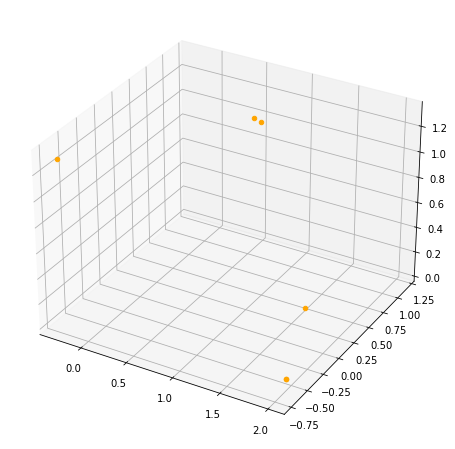

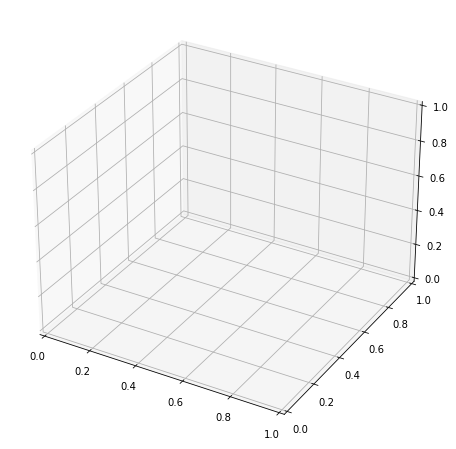

In [91]:
def graph_points(result, index, hashmap):
    X = result 
    I = index 
    A_to_X = hashmap 
    l_bound = -4
    h_bound = 4
    
    plt.figure(figsize = (8,8))
    ax = plt.axes(projection='3d')
    
    for i in range(0,len(X)): #plot scatter 
        ax.scatter(X[i][0], X[i][1], X[i][2], color = 'Orange')
    plt.figure(figsize = (8,8))
    ax = plt.axes(projection='3d')
            
    
    for i in range(0, len(I)):
        point1 = A_to_X[I[i][0]]
        point2 = A_to_X[I[i][1]] 
        ax.plot((point1[0][0],point2[0][0]),(point1[0][1],point2[0][1]),(point1[0][2],point2[0][2]),c = 'blue',alpha=0.25)
    

    plt.title('Polyhedron')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_zlabel('z')
    ax.set_zlim3d(l_bound, h_bound)       
    ax.set_ylim3d(l_bound, h_bound)                   
    ax.set_xlim3d(l_bound, h_bound)
    ax.view_init(0,30)
    ax.view_init(10,160)

n = 20
d = 3
A = np.random.randn(n, d)
A /= np.sqrt(np.sum(A**2, axis=1)).reshape(-1, 1)
b = 1 + np.random.random(n)

for i in range(0,len(b)):
    b[i] = round(b[i],3)

result_3d, hashmap_3d, index_3d = VertexFinder(A, b, n) 

graph_points(result_3d,index_3d,hashmap_3d)

I did Question 2 with a lot of help from other people -- I'm not sure I understand exactly what I did and it doesnt really work very well either. Feel free not to grade it with this in mind.